In [1]:
import pandas as pd

df = pd.read_csv('IHME_GBD_2019_CHEWING_TOB_1990_2019_DATA_Y2021M05D27.CSV', encoding='latin1')

print(df.head())


   measure_id measure_name  location_id location_name  sex_id sex_name  \
0           5   Prevalence            1        Global       1     Male   
1           5   Prevalence            1        Global       2   Female   
2           5   Prevalence            1        Global       1     Male   
3           5   Prevalence            1        Global       2   Female   
4           5   Prevalence            1        Global       1     Male   

   age_group_id age_group_name  rei_id         rei_name  metric_id  \
0             8       15 to 19     332  Chewing tobacco          3   
1             8       15 to 19     332  Chewing tobacco          3   
2             8       15 to 19     332  Chewing tobacco          3   
3             8       15 to 19     332  Chewing tobacco          3   
4             8       15 to 19     332  Chewing tobacco          3   

  metric_name  year_id       val     upper     lower  
0        Rate     1990  0.038740  0.055586  0.027147  
1        Rate     1990  

In [2]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350550 entries, 0 to 350549
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   measure_id      350550 non-null  int64  
 1   measure_name    350550 non-null  object 
 2   location_id     350550 non-null  int64  
 3   location_name   350550 non-null  object 
 4   sex_id          350550 non-null  int64  
 5   sex_name        350550 non-null  object 
 6   age_group_id    350550 non-null  int64  
 7   age_group_name  350550 non-null  object 
 8   rei_id          350550 non-null  int64  
 9   rei_name        350550 non-null  object 
 10  metric_id       350550 non-null  int64  
 11  metric_name     350550 non-null  object 
 12  year_id         350550 non-null  int64  
 13  val             350550 non-null  float64
 14  upper           350550 non-null  float64
 15  lower           350550 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 42.8+ M

In [3]:
print(df.describe())

       measure_id    location_id         sex_id   age_group_id    rei_id  \
count    350550.0  350550.000000  350550.000000  350550.000000  350550.0   
mean          5.0     135.639024       2.000000      29.421053     332.0   
std           0.0      98.136414       0.816498      48.993427       0.0   
min           5.0       1.000000       1.000000       8.000000     332.0   
25%           5.0      62.000000       1.000000      12.000000     332.0   
50%           5.0     122.000000       2.000000      17.000000     332.0   
75%           5.0     182.000000       3.000000      27.000000     332.0   
max           5.0     522.000000       3.000000     235.000000     332.0   

       metric_id        year_id            val          upper          lower  
count   350550.0  350550.000000  350550.000000  350550.000000  350550.000000  
mean         3.0    2004.500000       0.020179       0.032878       0.011704  
std          0.0       8.655454       0.049594       0.070631       0.034127  

In [4]:
mean_val = df['val'].mean()
print(f'średnia ilość rzujących to {mean_val}')

mediane_upper = df['upper'].median()
print(f'mediana górnej graicyto {mediane_upper}')

std_lower = df['lower'].std()
print(f'odchylenie standardowe dolnej granicy to {std_lower}')



średnia ilość rzujących to 0.020178816871399226
mediana górnej graicyto 0.009064496
odchylenie standardowe dolnej granicy to 0.034126627038329235


In [5]:
missing_values = df.isnull().sum()
print("Brakujące wartości w kazdej kolumnie:")
print(missing_values)

Brakujące wartości w kazdej kolumnie:
measure_id        0
measure_name      0
location_id       0
location_name     0
sex_id            0
sex_name          0
age_group_id      0
age_group_name    0
rei_id            0
rei_name          0
metric_id         0
metric_name       0
year_id           0
val               0
upper             0
lower             0
dtype: int64


In [6]:
df['val'] = df['val'].fillna(df['val'].mean())

In [7]:
df.dropna(subset=['val'], inplace = True)

In [8]:
Q1 = df['val'].quantile(0.25)
Q3 = df['val'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['val'] < (Q1 - 1.5 * IQR)) | (df['val'] < (Q3 + 1.5 * IQR))]
print("wartości odstające:")
print(outliers)

wartości odstające:
        measure_id measure_name  location_id location_name  sex_id sex_name  \
1                5   Prevalence            1        Global       2   Female   
3                5   Prevalence            1        Global       2   Female   
5                5   Prevalence            1        Global       2   Female   
7                5   Prevalence            1        Global       2   Female   
9                5   Prevalence            1        Global       2   Female   
...            ...          ...          ...           ...     ...      ...   
350545           5   Prevalence          522         Sudan       3     Both   
350546           5   Prevalence          522         Sudan       3     Both   
350547           5   Prevalence          522         Sudan       3     Both   
350548           5   Prevalence          522         Sudan       3     Both   
350549           5   Prevalence          522         Sudan       3     Both   

        age_group_id    age_gro

macierz korelacji:
              measure_id   location_id        sex_id  age_group_id  rei_id  \
measure_id           NaN           NaN           NaN           NaN     NaN   
location_id          NaN  1.000000e+00 -1.915736e-16 -9.954440e-16     NaN   
sex_id               NaN -1.915736e-16  1.000000e+00  4.882346e-19     NaN   
age_group_id         NaN -9.954440e-16  4.882346e-19  1.000000e+00     NaN   
rei_id               NaN           NaN           NaN           NaN     NaN   
metric_id            NaN           NaN           NaN           NaN     NaN   
year_id              NaN  6.041010e-13  1.317749e-16 -4.971165e-16     NaN   
val                  NaN  4.085158e-02 -1.796110e-02  1.440051e-02     NaN   
upper                NaN  4.891981e-02 -2.994131e-02  1.937728e-02     NaN   
lower                NaN  3.261103e-02 -3.448089e-03  8.555796e-03     NaN   

              metric_id       year_id       val     upper     lower  
measure_id          NaN           NaN       NaN     

<Axes: xlabel='val', ylabel='upper'>

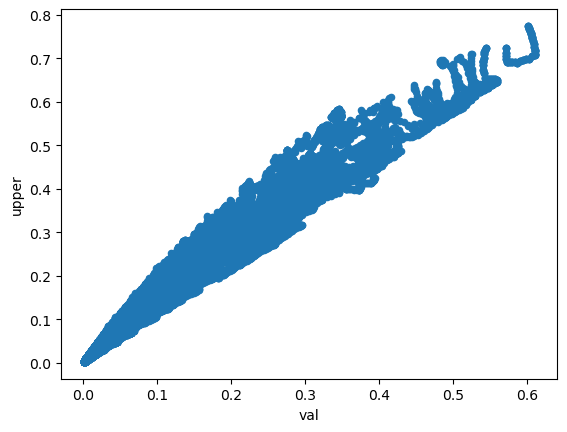

In [9]:
correlation_matrix = df.corr(numeric_only = True)
print("macierz korelacji:")
print(correlation_matrix)

df.plot.scatter(x='val',y='upper')

In [10]:
df['LowerTolerance']=df['lower'] - df['val']
print(df)

        measure_id measure_name  location_id location_name  sex_id sex_name  \
0                5   Prevalence            1        Global       1     Male   
1                5   Prevalence            1        Global       2   Female   
2                5   Prevalence            1        Global       1     Male   
3                5   Prevalence            1        Global       2   Female   
4                5   Prevalence            1        Global       1     Male   
...            ...          ...          ...           ...     ...      ...   
350545           5   Prevalence          522         Sudan       3     Both   
350546           5   Prevalence          522         Sudan       3     Both   
350547           5   Prevalence          522         Sudan       3     Both   
350548           5   Prevalence          522         Sudan       3     Both   
350549           5   Prevalence          522         Sudan       3     Both   

        age_group_id    age_group_name  rei_id     

In [11]:
grouped = df.groupby('location_name')['val'].mean()
grouped

location_name
Afghanistan                           0.036774
Albania                               0.005881
Algeria                               0.042593
American Samoa                        0.023810
Andorra                               0.001858
                                        ...   
Venezuela (Bolivarian Republic of)    0.012230
Viet Nam                              0.023155
Yemen                                 0.104453
Zambia                                0.011334
Zimbabwe                              0.007761
Name: val, Length: 205, dtype: float64

In [12]:
df_sorted = df.sort_values(by='val')
df_sorted.head(20)

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_group_id,age_group_name,rei_id,rei_name,metric_id,metric_name,year_id,val,upper,lower,LowerTolerance
340439,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2019,0.001051,0.002302,0.000383,-0.000668
340437,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2018,0.001051,0.002292,0.000387,-0.000665
340429,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2014,0.001051,0.002291,0.000418,-0.000634
340431,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2015,0.001053,0.002280,0.000399,-0.000654
340435,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2017,0.001054,0.002341,0.000394,-0.000659
340433,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2016,0.001054,0.002319,0.000403,-0.000651
340427,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2013,0.001055,0.002269,0.000411,-0.000644
340425,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2012,0.001057,0.002319,0.000406,-0.000651
340423,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2011,0.001060,0.002342,0.000408,-0.000652
340421,5,Prevalence,396,San Marino,2,Female,9,20 to 24,332,Chewing tobacco,3,Rate,2010,0.001063,0.002384,0.000392,-0.000671
